## Import modules

In [1]:
import os
if not os.path.isdir('feffi'): #if not already in right place - hacky!
    os.chdir("../") #for feffi to work
print(os.getcwd())
    
from fenics import *
import feffi
import matplotlib.pyplot as plt
from time import time

/home/stefano/git/fenics-phd


## Experiment with just two grids

[12:01:18] BCs were only given for V, Q, T spaces.
[12:01:18] BCs - Boundary right, space V[0] (marker 1), value 0
[12:01:18] BCs - Boundary right, space V[1] (marker 1), value 0
[12:01:18] BCs - Boundary bottom, space V[0] (marker 3), value 0
[12:01:18] BCs - Boundary bottom, space V[1] (marker 3), value 0
[12:01:18] BCs - Boundary left, space V[0] (marker 2), value 0
[12:01:18] BCs - Boundary left, space V[1] (marker 2), value 0
[12:01:18] BCs - Boundary top, space V[0] (marker 4), value 0
[12:01:18] BCs - Boundary top, space V[1] (marker 4), value 0
[12:01:18] BCs - Point (1, 1), space Q, value 0
[12:01:18] BCs - Boundary right, space T (marker 1), value 1
[12:01:18] BCs - Boundary left, space T (marker 2), value 0
[12:01:18] Initialized simulation.
[12:01:18] Running parameters:
{'final_time': 10000000000.0, 'steps_n': 100, 'simulation_precision': -2, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 1, 'nu': [1], 'alpha': [1], 'rho_0

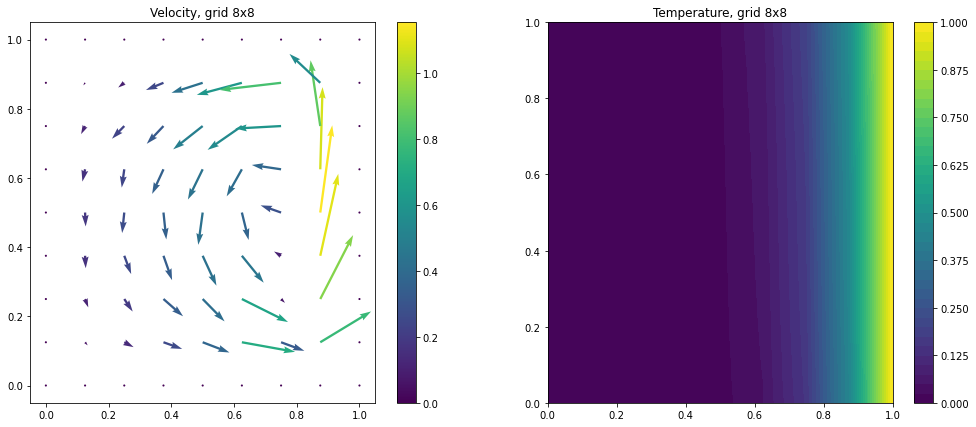

In [2]:
feffi.parameters.define_parameters({'config_file' : 'feffi/config/buoyancy-driven-cavity.yml', 
                                    'simulation_precision' : -2, 'beta':1000,
                                    'steps_n' : 100, 'final_time':1e10, 'max_iter':2})
mesh = UnitSquareMesh(8,8)
f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)

boundary = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, boundary.BCs)

simul.run()

fig = plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
pl = plot(f['u_'], title="Velocity, grid {res}x{res}".format(res=8))
plt.colorbar(pl)
plt.subplot(1,2,2)
pl = plot(f['T_'], title="Temperature, grid {res}x{res}".format(res=8))
plt.colorbar(pl)
plt.show()

BCs were only given for V, Q, T spaces.
BCs - Boundary right, space V[0] (marker 1), value 0
BCs - Boundary right, space V[1] (marker 1), value 0
BCs - Boundary bottom, space V[0] (marker 2), value 0
BCs - Boundary bottom, space V[1] (marker 2), value 0
BCs - Boundary left, space V[0] (marker 3), value 0
BCs - Boundary left, space V[1] (marker 3), value 0
BCs - Boundary top, space V[0] (marker 4), value 0
BCs - Boundary top, space V[1] (marker 4), value 0
BCs - Point (1, 1), space Q, value 0
BCs - Boundary right, space T (marker 1), value 0
BCs - Boundary left, space T (marker 3), value 1
Initialized simulation
Running full simulation; started at 2021-03-30 08:16:37.351031 
Timestep 0 of 1000000000000:
  Non-linearity u-P solved in 2 steps.
  ||u|| = 2.44, ||u||_8 = 3.73, ||u-u_n|| = 0.02, ||u-u_n||/||u|| = 0.01
  ||p|| = 207.93, ||p||_8 = 500.84, ||p-p_n|| = 1.09, ||p-p_n||/||p|| = 0.01
  ||T|| = 0.58, ||T||_8 = 1.0, ||T-T_n|| = 0.0, ||T-T_n||/||T|| = 0.0
Timestep 10 of 1000000000000:

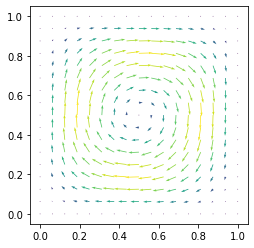

In [7]:
mesh2 = UnitSquareMesh(16,16)
f_spaces2 = feffi.functions.define_function_spaces(mesh2)
f2 = feffi.functions.define_functions(f_spaces2)
f2['sol'].assign(interpolate(f['sol'], f_spaces2['W']))
f2['T_'].assign(interpolate(f['T_'], f_spaces2['T']))
f2['T_n'].assign(interpolate(f['T_'], f_spaces2['T']))

boundary = feffi.boundaries.Domain(mesh2, f_spaces2)
simul = feffi.simulation.Simulation(f2, boundary.BCs)
simul.run()

plot(f2['sol'].split()[0])
plt.show()

## Full multigrid, from 8x8 to 128x128

In [ ]:
start_time = time()

feffi.parameters.define_parameters({'config_file' : 'feffi/config/buoyancy-driven-cavity.yml', 
                                    'simulation_precision' : -2, 'beta':1e6,
                                    'steps_n' : 100, 'final_time':1e10})

for res in [2**pow for pow in range(3,8)]:
    if res > 8: #not first step
        mesh_old = Mesh(mesh); f_spaces_old = dict(f_spaces); f_old = dict(f)
        
    mesh = UnitSquareMesh(res, res)
    f_spaces = feffi.functions.define_function_spaces(mesh)
    f = feffi.functions.define_functions(f_spaces)
    
    if res > 8:
        f['sol'].assign(interpolate(f_old['sol'], f_spaces['W']))
        f['T_'].assign(interpolate(f_old['T_'], f_spaces['T']))
        f['T_n'].assign(interpolate(f_old['T_'], f_spaces['T']))

    boundary = feffi.boundaries.Domain(mesh, f_spaces)
    simul = feffi.simulation.Simulation(f, boundary.BCs)
    simul.run()

    print('Resolution {}'.format(res))
    fig = plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    pl = plot(f['u_'], title="Velocity, grid {res}x{res}".format(res=res))
    plt.colorbar(pl)
    plt.subplot(1,2,2)
    pl = plot(f['T_'], title="Temperature, grid {res}x{res}".format(res=res))
    plt.colorbar(pl)
    plt.show()

print('Completed in {} seconds'.format(time()-start_time))

BCs were only given for V, Q, T spaces.
BCs - Boundary right, space V[0] (marker 1), value 0
BCs - Boundary right, space V[1] (marker 1), value 0
BCs - Boundary bottom, space V[0] (marker 2), value 0
BCs - Boundary bottom, space V[1] (marker 2), value 0
BCs - Boundary left, space V[0] (marker 3), value 0
BCs - Boundary left, space V[1] (marker 3), value 0
BCs - Boundary top, space V[0] (marker 4), value 0
BCs - Boundary top, space V[1] (marker 4), value 0
BCs - Point (1, 1), space Q, value 0
BCs - Boundary right, space T (marker 1), value 0
BCs - Boundary left, space T (marker 3), value 1
Initialized simulation
Running full simulation; started at 2021-04-01 10:55:31.617715 
Timestep 0 of 1000000000000:
  Non-linearity u-P solved in 1 steps.
  ||u|| = 0.0, ||u||_8 = 0.0, ||u-u_n|| = 0.0, ||u-u_n||/||u|| = 1.0
  ||p|| = 0.58, ||p||_8 = 1.0, ||p-p_n|| = 0.58, ||p-p_n||/||p|| = 1.0
  ||T|| = 0.24, ||T||_8 = 1.0, ||T-T_n|| = 0.24, ||T-T_n||/||T|| = 1.0
Timestep 10 of 1000000000000:
  Non-li

  ||p|| = 349531.98, ||p||_8 = 509743.44, ||p-p_n|| = 67889.52, ||p-p_n||/||p|| = 0.19
  ||T|| = 0.6, ||T||_8 = 1.41, ||T-T_n|| = 0.22, ||T-T_n||/||T|| = 0.36
Timestep 250 of 1000000000000:
  Non-linearity u-P solved in 29 steps.
  ||u|| = 296.5, ||u||_8 = 586.88, ||u-u_n|| = 248.88, ||u-u_n||/||u|| = 0.84
  ||p|| = 318195.39, ||p||_8 = 503214.81, ||p-p_n|| = 47856.18, ||p-p_n||/||p|| = 0.15
  ||T|| = 0.51, ||T||_8 = 1.0, ||T-T_n|| = 0.14, ||T-T_n||/||T|| = 0.27
Timestep 260 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 298.95, ||u||_8 = 470.06, ||u-u_n|| = 221.87, ||u-u_n||/||u|| = 0.74
  ||p|| = 314035.55, ||p||_8 = 493819.2, ||p-p_n|| = 115901.2, ||p-p_n||/||p|| = 0.37
  ||T|| = 0.53, ||T||_8 = 1.0, ||T-T_n|| = 0.05, ||T-T_n||/||T|| = 0.09
Timestep 270 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 299.63, ||u||_8 = 599.0, ||u-u_n|| = 251.13, ||u-u_n||/||u|| = 0.84
  ||p|| = 327729.11, ||p||_8 = 499274.95, ||p-p_n|| = 51770.47, ||p-p_n||/||

  Non-linearity u-P solved in 31 steps.
  ||u|| = 118.87, ||u||_8 = 261.53, ||u-u_n|| = 169.85, ||u-u_n||/||u|| = 1.43
  ||p|| = 303613.05, ||p||_8 = 501421.26, ||p-p_n|| = 30682.73, ||p-p_n||/||p|| = 0.1
  ||T|| = 0.56, ||T||_8 = 1.26, ||T-T_n|| = 0.13, ||T-T_n||/||T|| = 0.24
Timestep 520 of 1000000000000:
  Non-linearity u-P solved in 20 steps.
  ||u|| = 279.47, ||u||_8 = 466.02, ||u-u_n|| = 215.94, ||u-u_n||/||u|| = 0.77
  ||p|| = 305107.92, ||p||_8 = 494702.04, ||p-p_n|| = 94260.39, ||p-p_n||/||p|| = 0.31
  ||T|| = 0.53, ||T||_8 = 1.0, ||T-T_n|| = 0.06, ||T-T_n||/||T|| = 0.12
Timestep 530 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 158.41, ||u||_8 = 396.95, ||u-u_n|| = 207.24, ||u-u_n||/||u|| = 1.31
  ||p|| = 328234.88, ||p||_8 = 493705.99, ||p-p_n|| = 30772.96, ||p-p_n||/||p|| = 0.09
  ||T|| = 0.56, ||T||_8 = 1.22, ||T-T_n|| = 0.23, ||T-T_n||/||T|| = 0.42
Timestep 540 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 189.01, ||u||_8 = 539.

  ||T|| = 0.72, ||T||_8 = 2.88, ||T-T_n|| = 1.78, ||T-T_n||/||T|| = 2.46
Timestep 780 of 1000000000000:
  Non-linearity u-P solved in 29 steps.
  ||u|| = 284.7, ||u||_8 = 538.95, ||u-u_n|| = 205.56, ||u-u_n||/||u|| = 0.72
  ||p|| = 303675.14, ||p||_8 = 469453.53, ||p-p_n|| = 81275.29, ||p-p_n||/||p|| = 0.27
  ||T|| = 0.53, ||T||_8 = 1.47, ||T-T_n|| = 0.06, ||T-T_n||/||T|| = 0.11
Timestep 790 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 122.45, ||u||_8 = 258.8, ||u-u_n|| = 156.38, ||u-u_n||/||u|| = 1.28
  ||p|| = 303155.74, ||p||_8 = 501417.26, ||p-p_n|| = 26361.43, ||p-p_n||/||p|| = 0.09
  ||T|| = 0.56, ||T||_8 = 1.31, ||T-T_n|| = 0.12, ||T-T_n||/||T|| = 0.21
Timestep 800 of 1000000000000:
  Non-linearity u-P solved in 15 steps.
  ||u|| = 264.53, ||u||_8 = 445.61, ||u-u_n|| = 195.12, ||u-u_n||/||u|| = 0.74
  ||p|| = 309868.42, ||p||_8 = 501166.65, ||p-p_n|| = 87404.55, ||p-p_n||/||p|| = 0.28
  ||T|| = 0.54, ||T||_8 = 1.0, ||T-T_n|| = 0.05, ||T-T_n||/||T|| = 0.09


  ||p|| = 405227.46, ||p||_8 = 665893.23, ||p-p_n|| = 332749.19, ||p-p_n||/||p|| = 0.82
  ||T|| = 0.61, ||T||_8 = 1.28, ||T-T_n|| = 0.19, ||T-T_n||/||T|| = 0.31
Timestep 1050 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 398.31, ||u||_8 = 612.42, ||u-u_n|| = 478.38, ||u-u_n||/||u|| = 1.2
  ||p|| = 351260.23, ||p||_8 = 580033.85, ||p-p_n|| = 86933.56, ||p-p_n||/||p|| = 0.25
  ||T|| = 0.55, ||T||_8 = 1.0, ||T-T_n|| = 0.15, ||T-T_n||/||T|| = 0.28
Timestep 1060 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 362.47, ||u||_8 = 634.4, ||u-u_n|| = 420.86, ||u-u_n||/||u|| = 1.16
  ||p|| = 331103.58, ||p||_8 = 529850.76, ||p-p_n|| = 93708.61, ||p-p_n||/||p|| = 0.28
  ||T|| = 0.52, ||T||_8 = 1.0, ||T-T_n|| = 0.15, ||T-T_n||/||T|| = 0.3
Timestep 1070 of 1000000000000:
  Non-linearity u-P solved in 20 steps.
  ||u|| = 270.3, ||u||_8 = 504.01, ||u-u_n|| = 190.13, ||u-u_n||/||u|| = 0.7
  ||p|| = 326097.01, ||p||_8 = 511258.26, ||p-p_n|| = 86211.58, ||p-p_n||

Timestep 1310 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 325.32, ||u||_8 = 610.69, ||u-u_n|| = 470.3, ||u-u_n||/||u|| = 1.45
  ||p|| = 297535.71, ||p||_8 = 496293.09, ||p-p_n|| = 92306.67, ||p-p_n||/||p|| = 0.31
  ||T|| = 0.51, ||T||_8 = 1.0, ||T-T_n|| = 0.17, ||T-T_n||/||T|| = 0.34
Timestep 1320 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 161.24, ||u||_8 = 399.27, ||u-u_n|| = 205.58, ||u-u_n||/||u|| = 1.27
  ||p|| = 341410.81, ||p||_8 = 508925.67, ||p-p_n|| = 29322.81, ||p-p_n||/||p|| = 0.09
  ||T|| = 0.6, ||T||_8 = 1.19, ||T-T_n|| = 0.25, ||T-T_n||/||T|| = 0.41
Timestep 1330 of 1000000000000:
  Non-linearity u-P solved in 31 steps.
  ||u|| = 124.12, ||u||_8 = 292.52, ||u-u_n|| = 170.29, ||u-u_n||/||u|| = 1.37
  ||p|| = 310557.57, ||p||_8 = 516389.59, ||p-p_n|| = 28511.34, ||p-p_n||/||p|| = 0.09
  ||T|| = 0.57, ||T||_8 = 1.15, ||T-T_n|| = 0.13, ||T-T_n||/||T|| = 0.22
Timestep 1340 of 1000000000000:
  Non-linearity u-P solved in 31 steps

## Same scenario as above, but without multigrid - straight to 128x128 grid

In [ ]:
feffi.parameters.define_parameters({'config_file' : 'feffi/config/buoyancy-driven-cavity.yml', 
                                    'simulation_precision' : -2, 'beta':1e6,
                                    'steps_n' : 100, 'final_time':1e10})
mesh = UnitSquareMesh(32,32)
f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)

boundary = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, boundary.BCs)

simul.run()

fig = plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
pl = plot(f['u_'], title="Velocity, grid {res}x{res}".format(res=128))
plt.colorbar(pl)
plt.subplot(1,2,2)
pl = plot(f['T_'], title="Temperature, grid {res}x{res}".format(res=128))
plt.colorbar(pl)
plt.show()

[11:57:15] BCs were only given for V, Q, T spaces.
[11:57:15] BCs - Boundary right, space V[0] (marker 1), value 0
[11:57:15] BCs - Boundary right, space V[1] (marker 1), value 0
[11:57:15] BCs - Boundary bottom, space V[0] (marker 3), value 0
[11:57:15] BCs - Boundary bottom, space V[1] (marker 3), value 0
[11:57:15] BCs - Boundary left, space V[0] (marker 2), value 0
[11:57:15] BCs - Boundary left, space V[1] (marker 2), value 0
[11:57:15] BCs - Boundary top, space V[0] (marker 4), value 0
[11:57:15] BCs - Boundary top, space V[1] (marker 4), value 0
[11:57:15] BCs - Point (1, 1), space Q, value 0
[11:57:15] BCs - Boundary right, space T (marker 1), value 1
[11:57:15] BCs - Boundary left, space T (marker 2), value 0
[11:57:15] Initialized simulation.
[11:57:15] Running parameters:
{'final_time': 10000000000.0, 'steps_n': 100, 'simulation_precision': -2, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 1, 'nu': [1], 'alpha': [1], 'rho_0